# Matplotlib: Lines and markers

Let's draw some lines using the default styles:

In [1]:
%config InlineBackend.figure_format = 'svg'

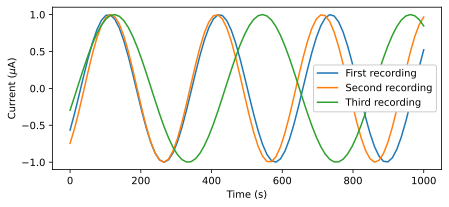

In [2]:
# Import matplotlib and numpy, generate some data
import matplotlib.pyplot as plt
import numpy as np

t = np.linspace(0, 1000, 80)
c1 = np.sin((t - 30) * 0.02)
c2 = np.sin((t - 40) * 0.021)
c3 = np.sin((t - 20) * 0.015)

# Create a figure of 7 by 3 inches
fig = plt.figure(figsize=(7, 3))

# Add an axes object --- always set labels!
ax = fig.add_subplot()
ax.set_xlabel('Time (s)')
ax.set_ylabel('Current ($\mu$A)')

# Plot the data
ax.plot(t, c1, label='First recording')
ax.plot(t, c2, label='Second recording')
ax.plot(t, c3, label='Third recording')

# Add a legend
ax.legend(framealpha=1)

# Show the figure
plt.show()

## Short-hand syntax

we can customise these lines using the short-hand syntax that sets colour, line style, and marker.
For a full description, see ["notes" on this page](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.plot.html).

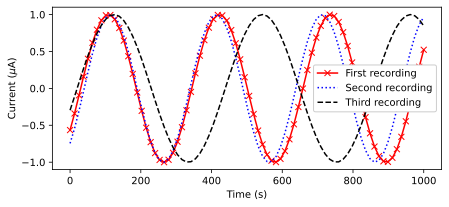

In [3]:
fig = plt.figure(figsize=(7, 3))
ax = fig.add_subplot()
ax.set_xlabel('Time (s)')
ax.set_ylabel('Current ($\mu$A)')
ax.plot(t, c1, 'r-x', label='First recording')
ax.plot(t, c2, 'b:', label='Second recording')
ax.plot(t, c3, 'k--', label='Third recording')
ax.legend(framealpha=1)
plt.show()

References:
- [colour codes](https://matplotlib.org/stable/tutorials/colors/colors.html)
- [line style codes](https://matplotlib.org/stable/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D.set_linestyle)
- [marker codes](https://matplotlib.org/stable/api/markers_api.html#module-matplotlib.markers)

## Colours

If we want to code to be a bit more readable, we can use separate arguments for each aspect.
For example, colour can be set using the `color` argument:

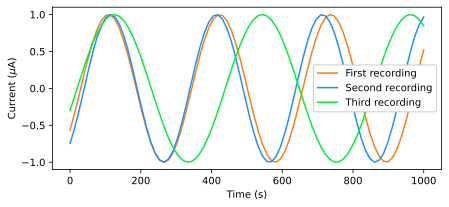

In [4]:
fig = plt.figure(figsize=(7, 3))
ax = fig.add_subplot()
ax.set_xlabel('Time (s)')
ax.set_ylabel('Current ($\mu$A)')
ax.plot(t, c1, color='tab:orange', label='First recording')
ax.plot(t, c2, color='dodgerblue', label='Second recording')
ax.plot(t, c3, color='#01ef3a', label='Third recording')
ax.legend(framealpha=1)
plt.show()

This gives us access to the full list of [named colours](https://matplotlib.org/stable/gallery/color/named_colors.html), lets us use RGB codes, and makes it easier to program things:

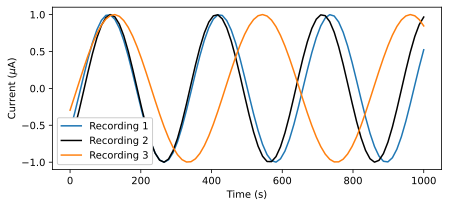

In [5]:
data = [c1, c2, c3]
colours = ['tab:blue', 'black', 'tab:orange']
labels = [f'Recording {1 + i}' for i in range(3)]

fig = plt.figure(figsize=(7, 3))
ax = fig.add_subplot()
ax.set_xlabel('Time (s)')
ax.set_ylabel('Current ($\mu$A)')
for y, color, label in zip(data, colours, labels):
    ax.plot(t, y, color=color, label=label)
ax.legend(framealpha=1)
plt.show()

### Setting with a colour map

Instead of defining our own colours, we can use colours from one of matplotlib's [built-in colour maps](https://matplotlib.org/stable/tutorials/colors/colormaps.html).

If you want the lines to be easily distinguishable, use one of the "qualitative" colormaps.


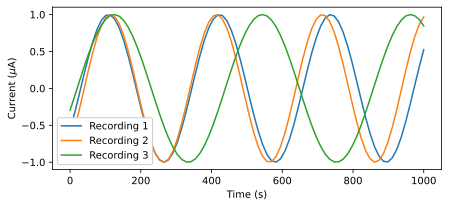

In [6]:
# Import matplotlib.
# This automatically imports matplotlib.cm
import matplotlib

# Load a colour map
cmap = matplotlib.cm.get_cmap('tab10')

# Qualitative color are indexed with integers:
colours = [cmap(i) for i in range(3)]

# Plot some lines
fig = plt.figure(figsize=(7, 3))
ax = fig.add_subplot()
ax.set_xlabel('Time (s)')
ax.set_ylabel('Current ($\mu$A)')
for y, color, label in zip(data, colours, labels):
    ax.plot(t, y, color=color, label=label)
ax.legend(framealpha=1)
plt.show()

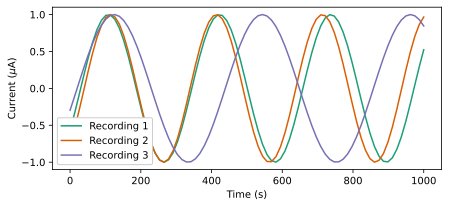

In [7]:
cmap = matplotlib.cm.get_cmap('Dark2')
colours = [cmap(i) for i in range(3)]

fig = plt.figure(figsize=(7, 3))
ax = fig.add_subplot()
ax.set_xlabel('Time (s)')
ax.set_ylabel('Current ($\mu$A)')
for y, color, label in zip(data, colours, labels):
    ax.plot(t, y, color=color, label=label)
ax.legend(framealpha=1)
plt.show()

If you have lots of lines, and if you don't need to clearly distinguish between them, you can also use a "sequential" colormap.

There are various issues with such colour maps, related to grayscale printing and colour blindness.
Many can be avoided by picking one of the "perceptually uniform sequential colormaps", in particular `viridis` or its successor, `cividis`.

Sequential colormaps are indexed with a float, ranging from 0 to 1.

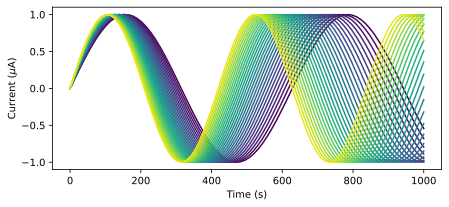

In [8]:
# Generate 30 traces
n = 30
lower = 0.01
upper = 0.015
factors = np.linspace(lower, upper, n)
data = [np.sin(t * f) for f in factors]

# Load a colormap
cmap = matplotlib.cm.get_cmap('viridis')

# Generate a list of colours, indexing with a float
colours = [cmap(i / n) for i in range(n)]

# Plot some coloured lines
fig = plt.figure(figsize=(7, 3))
ax = fig.add_subplot()
ax.set_xlabel('Time (s)')
ax.set_ylabel('Current ($\mu$A)')
for y, color in zip(data, colours):
    ax.plot(t, y, color=color)
plt.show()

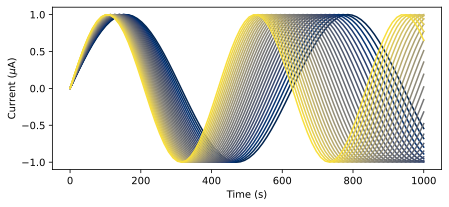

In [9]:
# Try a different colormap               
cmap = matplotlib.cm.get_cmap('cividis')
colours = [cmap(i / n) for i in range(n)]

fig = plt.figure(figsize=(7, 3))
ax = fig.add_subplot()
ax.set_xlabel('Time (s)')
ax.set_ylabel('Current ($\mu$A)')
for y, color in zip(data, colours):
    ax.plot(t, y, color=color)
plt.show()

### Normalisation and colour bars

Instead of calculating the colormap index ourselves, we can get matplotlib to do it:

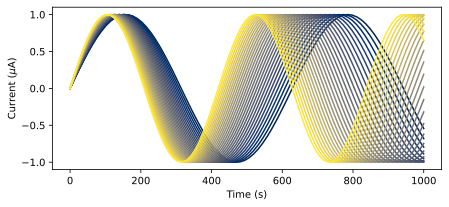

In [10]:
# Load a color map
cmap = matplotlib.cm.get_cmap('cividis')

# Set up a normalisation scheme
norm = matplotlib.colors.Normalize(lower, upper)

# Define colours, based on the "factor" parameter in each equation
colours = [cmap(norm(f)) for f in factors]

# Plot some lines
fig = plt.figure(figsize=(7, 3))
ax = fig.add_subplot()
ax.set_xlabel('Time (s)')
ax.set_ylabel('Current ($\mu$A)')
for y, color in zip(data, colours):
    ax.plot(t, y, color=color)   
plt.show()

One advantage of this approach is that we can now easily get the colour corresponding to a particular value (even if that colour wasn't in the original list):

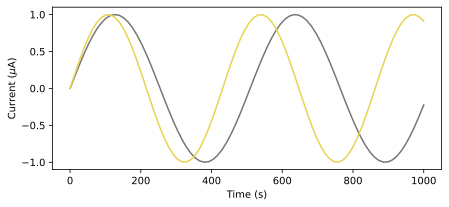

In [11]:
# Plot two particular lines
fig = plt.figure(figsize=(7, 3))
ax = fig.add_subplot()
ax.set_xlabel('Time (s)')
ax.set_ylabel('Current ($\mu$A)')
f = 0.01234
ax.plot(t, np.sin(t * f), color=cmap(norm(f)))
f = 0.014567
ax.plot(t, np.sin(t * f), color=cmap(norm(f)))
plt.show()

We also need a normalisation object to draw a colour bar.

The colorbar functions were designed with raster images in mind, so we need to use a slightly awkward method, and first create a "ScalarMappable" object, as suggested [in the colorbar docs](https://matplotlib.org/stable/gallery/subplots_axes_and_figures/colorbar_placement.html).

### Complete example:

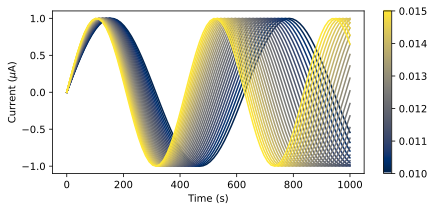

In [12]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# Generate 30 traces
t = np.linspace(0, 1000, 80)
n = 30
lower = 0.01
upper = 0.015
factors = np.linspace(lower, upper, n)
data = [np.sin(t * f) for f in factors]

# Load a color map
cmap = matplotlib.cm.get_cmap('cividis')

# Set up a normalisation scheme
norm = matplotlib.colors.Normalize(lower, upper)

# Define colours, based on the "factor" parameter in each equation
colours = [cmap(norm(f)) for f in factors]

# Plot some lines
fig = plt.figure(figsize=(7, 3))
ax = fig.add_subplot()
ax.set_xlabel('Time (s)')
ax.set_ylabel('Current ($\mu$A)')
for y, color in zip(data, colours):
    ax.plot(t, y, color=color)
    
# Add a colorbar
fig.colorbar(matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax)

# Show the result
plt.show()

### Setting with a cycler

If we don't specify a colour, matplotlib's default behaviour is to cycle over a colormap (in newer versions this is the `tab10` colormap).
We can mimic this behaviour by creating a `Cycler`.
The `Cycler` class was created specifically for matplotlib, but as it could be generally useful they gave it [its own package](https://pypi.org/project/cycler/) and [documentation](https://matplotlib.org/cycler/#motivation).

Here's an example of the default behaviour:

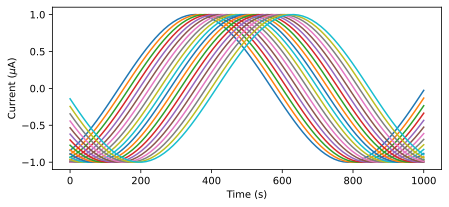

In [13]:
fig = plt.figure(figsize=(7, 3))
ax = fig.add_subplot()
ax.set_xlabel('Time (s)')
ax.set_ylabel('Current ($\mu$A)')

# Plot 20 lines. The colormap only has 10 values, so we'll see every colour twice
for f in np.linspace(1, 3, 20):
    ax.plot(t, np.sin(t - f))

plt.show()

Now let's retry, but with a cycler:

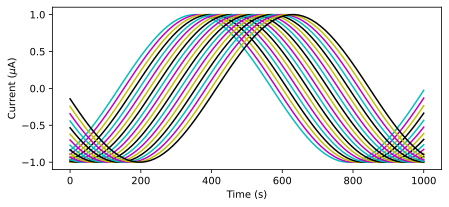

In [14]:
import cycler

# Create a cycler over 4 predefined colours
c = cycler.cycler(color=['c', 'm', 'y', 'k'])

fig = plt.figure(figsize=(7, 3))
ax = fig.add_subplot()
ax.set_xlabel('Time (s)')
ax.set_ylabel('Current ($\mu$A)')

# Tell the axes to use our cycler
ax.set_prop_cycle(c)

# Plot some lines
for f in np.linspace(1, 3, 20):
    ax.plot(t, np.sin(t - f))

plt.show()

And now let's combine the cycler with a (qualitative) colormap.
To get the number of colours in the map, we use the [property `N`](https://matplotlib.org/stable/api/_as_gen/matplotlib.colors.Colormap.html).

This map contains 8 colours


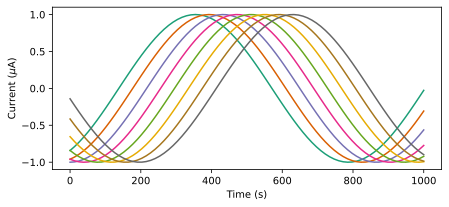

In [15]:
# Load a colormap
cmap = matplotlib.cm.get_cmap('Dark2')

# Create a list of colours
colors = [cmap(i) for i in range(cmap.N)]
print(f'This map contains {cmap.N} colours')

# Create a cycler over these colours
c = cycler.cycler(color=colors)

fig = plt.figure(figsize=(7, 3))
ax = fig.add_subplot()
ax.set_xlabel('Time (s)')
ax.set_ylabel('Current ($\mu$A)')
ax.set_prop_cycle(c)
for f in np.linspace(1, 3, cmap.N):
    ax.plot(t, np.sin(t - f))
plt.show()

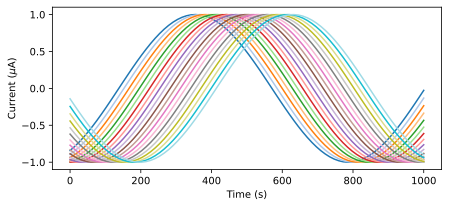

In [16]:
cmap = matplotlib.cm.get_cmap('tab20')

fig = plt.figure(figsize=(7, 3))
ax = fig.add_subplot()
ax.set_xlabel('Time (s)')
ax.set_ylabel('Current ($\mu$A)')
ax.set_prop_cycle(cycler.cycler(color=[cmap(i) for i in range(cmap.N)]))
for f in np.linspace(1, 3, cmap.N):
    ax.plot(t, np.sin(t - f))
plt.show()

Finally, we can add other properties to a cycler --- as long as they have the same period.

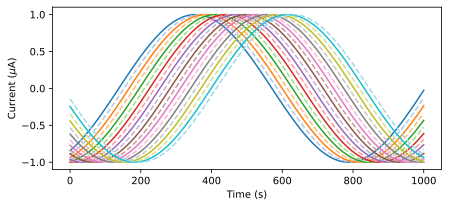

In [17]:
cmap = matplotlib.cm.get_cmap('tab20')
colors = [cmap(i) for i in range(20)]
linestyles = ['-', '--'] * 10
c = cycler.cycler(color=colors, linestyle=linestyles)

fig = plt.figure(figsize=(7, 3))
ax = fig.add_subplot()
ax.set_xlabel('Time (s)')
ax.set_ylabel('Current ($\mu$A)')
ax.set_prop_cycle(c)
for f in np.linspace(1, 3, cmap.N):
    ax.plot(t, np.sin(t - f))
plt.show()

## Transparency

Transparency can be set using the `alpha` keyword.
An alpha of 0 means fully transparent, 1 means fully opaque:

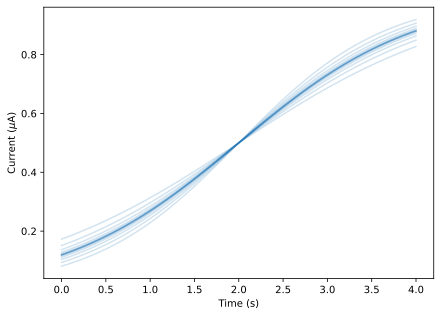

In [18]:
# Select 30 values `f` that lie mostly near 0
n = 15
lower = 1
upper = 2
factors = 1 + np.linspace(-0.6, 0.6, n)**3

# Generate values from a logistic model
t = np.linspace(0, 4, 80)
data = [1 / (1 + np.exp(-f * (t - 2))) for f in factors]

# Plot transparent lines to show the "distribution"
fig = plt.figure(figsize=(7, 5))
ax = fig.add_subplot()
ax.set_xlabel('Time (s)')
ax.set_ylabel('Current ($\mu$A)')
for y, color in zip(data, colours):
    ax.plot(t, y, color='tab:blue', alpha=0.2)
plt.show()

This can give some very pretty results, but remember that not all output formats support transparency.

Transparency can also have some unwanted side-effects.
For example, when plotting overlapping noisy traces:

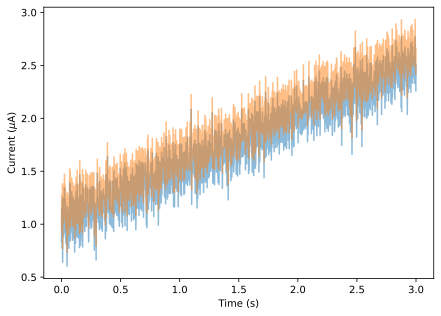

In [19]:
# Generate noisy traces
np.random.seed(123)  # Get consistent "random" results
t = np.linspace(0, 3, 2000)
c1 = 1 + t * 0.5
c2 = 1.13 + t * 0.51
n1 = np.random.normal(0, 0.15, t.shape)
n2 = np.random.normal(0, 0.1, t.shape)

# Plot with transparency
fig = plt.figure(figsize=(7, 5))
ax = fig.add_subplot()
ax.set_xlabel('Time (s)')
ax.set_ylabel('Current ($\mu$A)')
ax.plot(t, c1 + n1, alpha=0.5)
ax.plot(t, c2 + n1, alpha=0.5)
plt.show()

Here, the strong overlap has created a "third band" (dark brown) which isn't present in the data.

We can clarify the plot by adding a "filtered" trace:

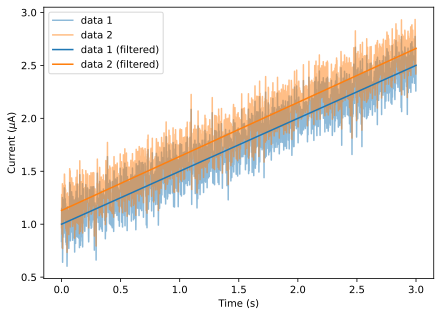

In [20]:
# Plot with transparency and without (filtered signal)
fig = plt.figure(figsize=(7, 5))
ax = fig.add_subplot()
ax.set_xlabel('Time (s)')
ax.set_ylabel('Current ($\mu$A)')
ax.plot(t, c1 + n1, color='tab:blue', alpha=0.5, label='data 1')
ax.plot(t, c2 + n1, color='tab:orange', alpha=0.5, label='data 2')
ax.plot(t, c1, color='tab:blue', label='data 1 (filtered)')
ax.plot(t, c2, color='tab:orange', label='data 2 (filtered)')
ax.legend()
plt.show()

### Don't use alpha for tone control

It can be tempting to use alpha + white background as a "tone control":

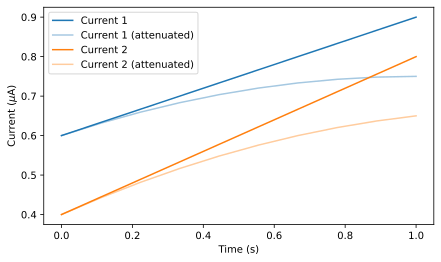

In [21]:
t = np.linspace(0, 1, 10)
c1a = 0.6 + 0.3 * t
c1b = 0.6 + 0.3 * t - 0.15 * t**2
c2a = 0.4 + 0.4 * t
c2b = 0.4 + 0.4 * t - 0.15 * t**2

alpha = 0.4
fig = plt.figure(figsize=(7, 4))
ax = fig.add_subplot()
ax.set_xlabel('Time (s)')
ax.set_ylabel('Current ($\mu$A)')
ax.plot(t, c1a, color='tab:blue', label='Current 1')
ax.plot(t, c1b, color='tab:blue', alpha=alpha, label='Current 1 (attenuated)')
ax.plot(t, c2a, color='tab:orange', label='Current 2')
ax.plot(t, c2b, color='tab:orange', alpha=alpha, label='Current 2 (attenuated)')
ax.legend()
plt.show()

This looks like a pretty good plot: 
All four lines are easily distinguished and the relationship between each current at its "attenuated" version is clear.

However, there are two major drawbacks:
- It only works on a white background: if lines overlap, we can get unwanted "artefacts" like in the previous example.
- We now require transparency support from the renderer, even though we don't want fancy transparency effects.

So it's better to use manual colours, e.g. from the tab20 colormap:

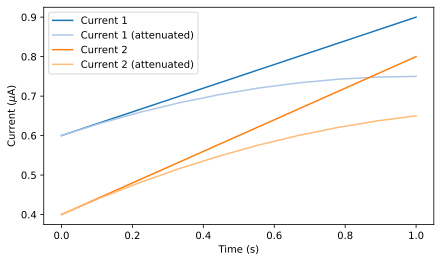

In [22]:
cmap = matplotlib.cm.get_cmap('tab20')

fig = plt.figure(figsize=(7, 4))
ax = fig.add_subplot()
ax.set_xlabel('Time (s)')
ax.set_ylabel('Current ($\mu$A)')
ax.plot(t, c1a, color=cmap(0), label='Current 1')
ax.plot(t, c1b, color=cmap(1), label='Current 1 (attenuated)')
ax.plot(t, c2a, color=cmap(2), label='Current 2')
ax.plot(t, c2b, color=cmap(3), label='Current 2 (attenuated)')
ax.legend()
plt.show()

## Line width and style

Just like colour, line style can be set with a separate keyword argument (either `linestyle` or `ls`).

Matplotlib's documentation provides a [list of line styles](https://matplotlib.org/stable/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D.set_linestyle).

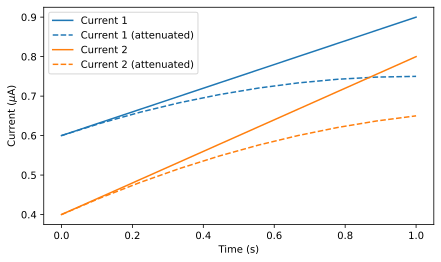

In [23]:
fig = plt.figure(figsize=(7, 4))
ax = fig.add_subplot()
ax.set_xlabel('Time (s)')
ax.set_ylabel('Current ($\mu$A)')
ax.plot(t, c1a, color='tab:blue', label='Current 1')
ax.plot(t, c1b, color='tab:blue', linestyle='--', label='Current 1 (attenuated)')
ax.plot(t, c2a, color='tab:orange', label='Current 2')
ax.plot(t, c2b, color='tab:orange', linestyle='--', label='Current 2 (attenuated)')
ax.legend()
plt.show()

Line width can be set with `lw` or `linewidth`, and is measured in points:

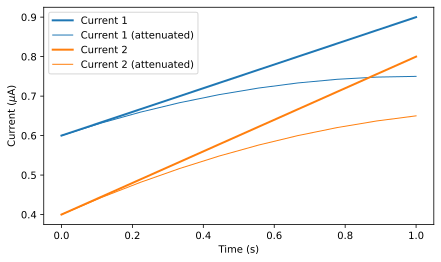

In [24]:
fig = plt.figure(figsize=(7, 4))
ax = fig.add_subplot()
ax.set_xlabel('Time (s)')
ax.set_ylabel('Current ($\mu$A)')
ax.plot(t, c1a, color='tab:blue', linewidth=2, label='Current 1')
ax.plot(t, c1b, color='tab:blue', linewidth=1, label='Current 1 (attenuated)')
ax.plot(t, c2a, color='tab:orange', linewidth=2, label='Current 2')
ax.plot(t, c2b, color='tab:orange', linewidth=1, label='Current 2 (attenuated)')
ax.legend()
plt.show()

## Markers

Markers can be chosen using the `marker` keyword, and customised using various `markerx` properties:

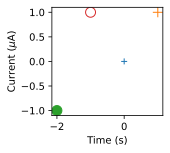

In [25]:
fig = plt.figure(figsize=(2, 2))
ax = fig.add_subplot()
ax.set_xlabel('Time (s)')
ax.set_ylabel('Current ($\mu$A)')
ax.plot(0, 0, marker='+')
ax.plot(1, 1, marker='+', markersize=10)
ax.plot(-2, -1, marker='o', markersize=10)
ax.plot(-1, 1, marker='o', markersize=10, fillstyle='none')
plt.show()

See [the documentation](https://matplotlib.org/stable/gallery/lines_bars_and_markers/marker_reference.html) for more info.

Note that you don't need special commands to do scatter plots:

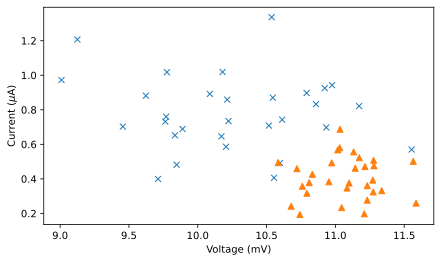

In [26]:
n = 30
x1 = np.random.normal(10.1, 0.7, n)
x2 = np.random.normal(11, 0.3, n)
y1 = np.random.normal(0.8, 0.2, n)
y2 = np.random.normal(0.4, 0.12, n)

fig = plt.figure(figsize=(7, 4))
ax = fig.add_subplot()
ax.set_xlabel('Voltage (mV)')
ax.set_ylabel('Current ($\mu$A)')
ax.plot(x1, y1, marker='x', linestyle='none')
ax.plot(x2, y2, marker='^', linestyle='none')
plt.show()

## Z-order

When two objects overlap, the one that comes out on top is determined by:

1. Their z-order
2. The order in which they were added to the figure.

We can see an example of rule 2 below:

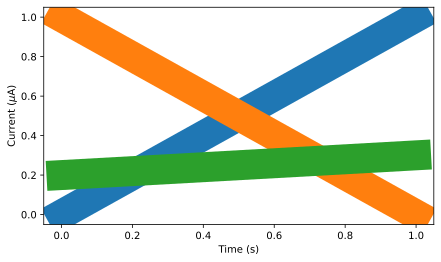

2
2
2


In [27]:
t = [0, 1]
c1 = [0, 1]
c2 = [1, 0]
c3 = [0.2, 0.3]

lw = 30
fig = plt.figure(figsize=(7, 4))
ax = fig.add_subplot()
ax.set_xlabel('Time (s)')
ax.set_ylabel('Current ($\mu$A)')
lines1 = ax.plot(t, c1, linewidth=lw)
lines2 = ax.plot(t, c2, linewidth=lw)
lines3 = ax.plot(t, c3, linewidth=lw)
plt.show()

print(lines1[0].zorder)
print(lines2[0].zorder)
print(lines3[0].zorder)

All three lines have the same z-order, but the last added one (green) is shown on top.

We can change this by messing with the z-order:

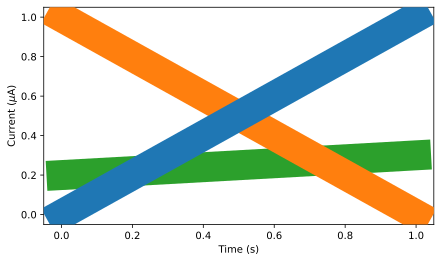

In [28]:
lw = 30
fig = plt.figure(figsize=(7, 4))
ax = fig.add_subplot()
ax.set_xlabel('Time (s)')
ax.set_ylabel('Current ($\mu$A)')
ax.plot(t, c1, linewidth=lw, zorder=10)
ax.plot(t, c2, linewidth=lw, zorder=9)
ax.plot(t, c3, linewidth=lw, zorder=8)
plt.show()

## Drawstyle

When drawing discontinuous signals (e.g. step-wise voltage protocols), the `drawstyle` (or `ds`) property comes into play.

In the following example we have a series of times at which a voltage is set.
The voltage is then held at that value until the next changepoint.

Plotting with the default settings gives us an interpolated trace:

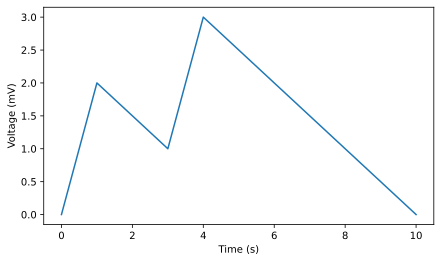

In [29]:
# Times at which the voltage changes
t = [0, 1, 3, 4, 8, 10]
# Values set at each time
v = [0, 2, 1, 3, 1, 0]

fig = plt.figure(figsize=(7, 4))
ax = fig.add_subplot()
ax.set_xlabel('Time (s)')
ax.set_ylabel('Voltage (mV)')
ax.plot(t, v)
plt.show()

Set the drawstyle to `steps-post` to get the desired result:

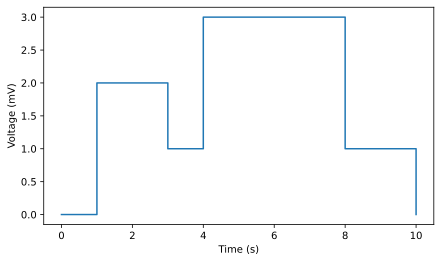

In [30]:
fig = plt.figure(figsize=(7, 4))
ax = fig.add_subplot()
ax.set_xlabel('Time (s)')
ax.set_ylabel('Voltage (mV)')
ax.plot(t, v, drawstyle='steps-post')
plt.show()

Other options may be more appropriate, depending on the interpretation of the data.
See [here](https://matplotlib.org/stable/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D.set_drawstyle).